In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
df = pd.read_csv("../input/melbourne-housing-snapshot/melb_data.csv")

In [3]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Missing Values

In [6]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
# Carspots
df["Car"].value_counts()
# Missing value might be showing there are no cars
# So I will replace it with zeros.
df["Car"] = df["Car"].fillna(0.0)

In [8]:
df["Suburb"].value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [9]:
df["CouncilArea"].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [10]:
# Columns to drop -> Suburb Address SellerG Date
df.drop("Suburb", axis=1, inplace=True)
df.drop("Address", axis=1, inplace=True)
df.drop("SellerG", axis=1, inplace=True)
df.drop("Date", axis=1, inplace=True)
# Too much outliers. I cant fill the values without corrupt the data.
df.drop("BuildingArea", axis=1, inplace=True)
df.drop("YearBuilt", axis=1, inplace=True)

# Outliers

In [11]:
df.head(10)

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,2,h,941000.0,S,2.5,3067.0,2.0,1.0,0.0,181.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,3,h,1876000.0,S,2.5,3067.0,4.0,2.0,0.0,245.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,2,h,1636000.0,S,2.5,3067.0,2.0,1.0,2.0,256.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,1,u,300000.0,S,2.5,3067.0,1.0,1.0,1.0,0.0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,2,h,1097000.0,S,2.5,3067.0,3.0,1.0,2.0,220.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [12]:
def outlier(col, df):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
    print(f"The outliers in {col} feature are values << {lower_bound} and >> {upper_bound}")
    minimum = df[col].min()
    maximum = df[col].max()
    print(f"The minimum value in {col} is {minimum} and maximum value is {maximum}")
    
    fig = px.box(df,y=col, width=800,title='Before capping the outliers')
    fig.show()
    
    df[col] = np.where(df[col]>upper_bound,upper_bound,df[col])
    
    fig = px.box(df,y=col, width=800,title='After capping the outliers')
    fig.show()
    
outlier("Landsize", df)
outlier("Price", df)

The outliers in Landsize feature are values << -534.0 and >> 1362.0
The minimum value in Landsize is 0.0 and maximum value is 433014.0


The outliers in Price feature are values << -370000.0 and >> 2350000.0
The minimum value in Price is 85000.0 and maximum value is 9000000.0


col = "Landsize"
IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
print(f"The outliers in {col} feature are values << {lower_bound} and >> {upper_bound}")
minimum = df[col].min()
maximum = df[col].max()
print(f"The minimum value in {col} is {minimum} and maximum value is {maximum}")

In [13]:
df["CouncilArea"].value_counts()
df["CouncilArea"] = df["CouncilArea"].fillna("Unavailable")

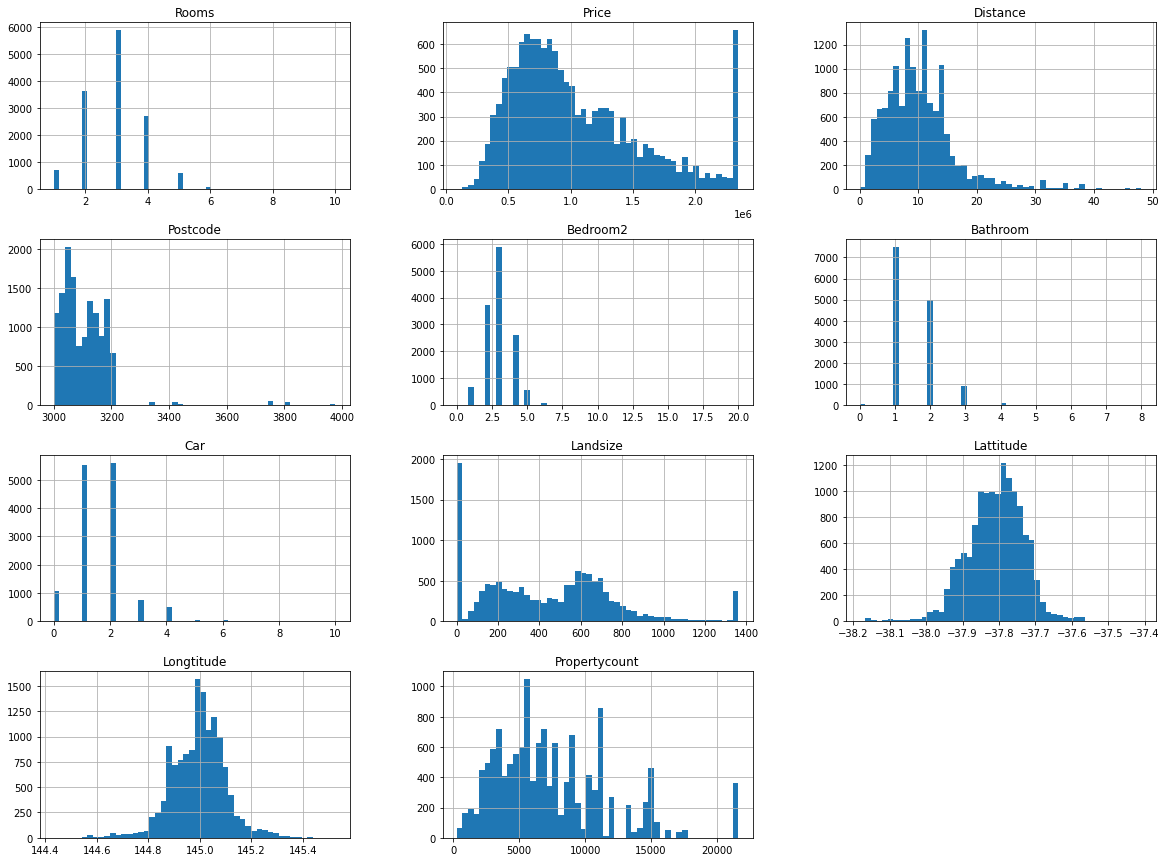

In [14]:
df.hist(bins=50, figsize=(20,15)) 
plt.show()

In [15]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.525198
Bedroom2         0.502971
Bathroom         0.457800
Landsize         0.275025
Car              0.233611
Longtitude       0.227166
Postcode         0.110800
Propertycount   -0.052931
Distance        -0.170763
Lattitude       -0.231513
Name: Price, dtype: float64

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Landsize', ylabel='Price'>,
        <AxesSubplot:xlabel='Distance', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Landsize'>,
        <AxesSubplot:xlabel='Landsize', ylabel='Landsize'>,
        <AxesSubplot:xlabel='Distance', ylabel='Landsize'>],
       [<AxesSubplot:xlabel='Price', ylabel='Distance'>,
        <AxesSubplot:xlabel='Landsize', ylabel='Distance'>,
        <AxesSubplot:xlabel='Distance', ylabel='Distance'>]], dtype=object)

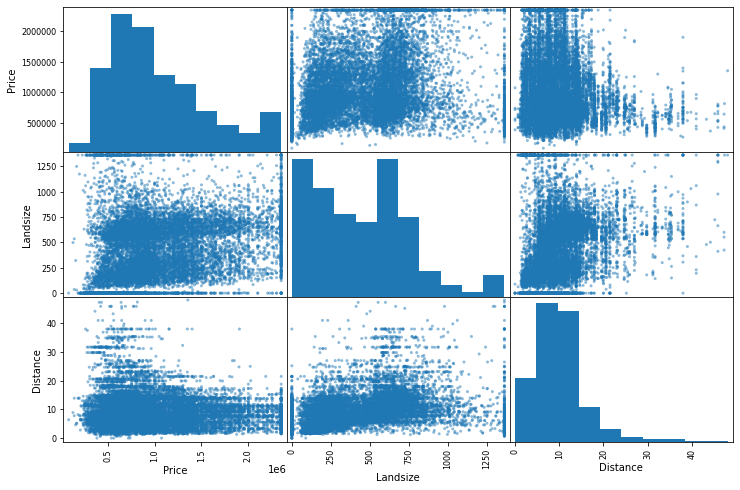

In [16]:
from pandas.plotting import scatter_matrix
attirubutes = ["Price", "Landsize", "Distance"]
scatter_matrix(df[attirubutes], figsize=(12, 8))

In [17]:
df.head(10) # Type, Method CouncilArea Regionname

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,2,h,941000.0,S,2.5,3067.0,2.0,1.0,0.0,181.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,3,h,1876000.0,S,2.5,3067.0,4.0,2.0,0.0,245.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,2,h,1636000.0,S,2.5,3067.0,2.0,1.0,2.0,256.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,1,u,300000.0,S,2.5,3067.0,1.0,1.0,1.0,0.0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,2,h,1097000.0,S,2.5,3067.0,3.0,1.0,2.0,220.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [18]:
y = df["Price"]
df.drop("Price", axis=1, inplace=True)
X = df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                        ("std_scaler", StandardScaler())
                        ])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_atr = ['Rooms', 'Distance', 'Postcode', 'Bedroom2',
           'Bathroom', 'Car', 'Landsize', 'Lattitude',
           'Longtitude','Propertycount']
cat_atr = ["Type", "Method", "CouncilArea", "Regionname"]
full_pipeline = ColumnTransformer([
                                  ("num", num_pipeline, num_atr),
                                  ("cat", OneHotEncoder(), cat_atr),
                                  ])
X_trainp = full_pipeline.fit_transform(X_train)

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_trainp, y_train)

RandomForestRegressor()

In [22]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_trainp, y_train)


SVR()

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_testp = full_pipeline.transform(X_test)
forest_prediction = forest_reg.predict(X_testp)
forest_mse = mean_squared_error(y_test, forest_prediction)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
r2_score(y_test, forest_prediction)

214816.90178459033


0.8372607331406301

In [24]:
svr_prediction = svr_reg.predict(X_testp)
svr_mse = mean_squared_error(y_test, svr_prediction)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)


551117.3979870252
